**Project Title**

ML-based Prediction and Analysis of Agri-Food CO₂ Emissions

**Problem Statement:** The agri-food sector contributes to nearly 62% of global annual CO₂ emissions, making it a critical driver of climate change. However, the complexity of multiple emission sources, such as crop residues, fertilizer use, and food transport, makes it challenging to assess and forecast their impact. There is a need for machine learning approaches to analyze these factors and provide reliable predictions for climate risk management.

**Description:** This project uses machine learning to study and forecast CO₂ emissions from the agri-food sector. By analyzing factors like agriculture practices, food processing, and population growth, the model identifies key drivers of emissions and predicts the Emissions. The results aim to support sustainable practices and climate risk reduction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
df =  pd.read_csv("Agrofood_co2_emission.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [4]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [5]:
# Shape and info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape of dataset: (6965, 31)

Data Types:
 Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in or

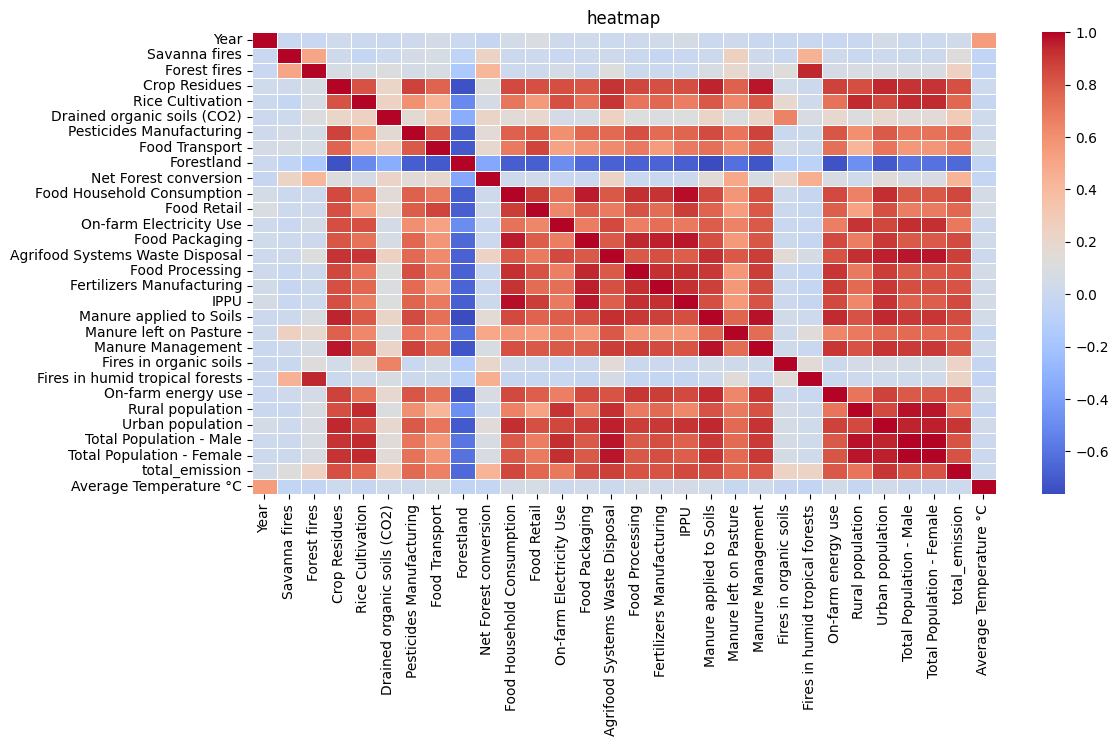

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),linewidths=0.5,annot=False,cmap="coolwarm")
plt.title('heatmap')
plt.show()

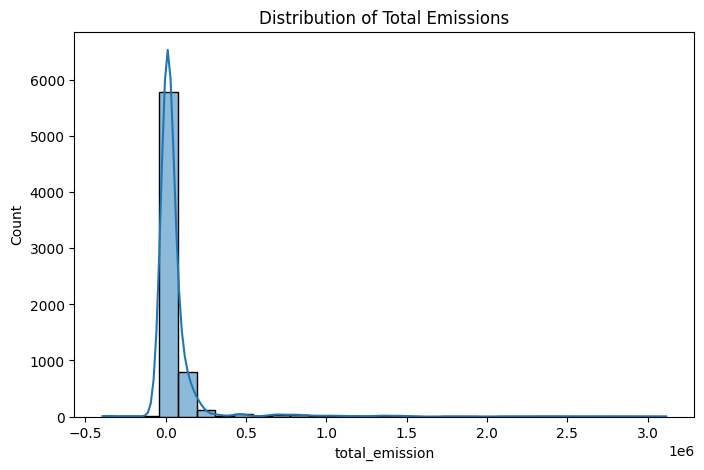

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_emission'], bins=30, kde=True)
plt.title("Distribution of Total Emissions")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

features = df[numeric_cols].drop(columns=['total_emission'])
target=df['total_emission']

#Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#scaled data
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['total_emission'] =target.values

In [9]:
df_scaled.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Average Temperature °C,total_emission
0,-1.700569,-0.22423,-0.248789,-0.239565,-0.202904,-0.22088,-0.225051,-0.334108,0.195742,-0.180563,...,-0.261690,-0.053393,-0.207073,-3.874290e-17,-0.092155,-0.218111,-0.161391,-0.165187,-0.605916,2198.963539
1,-1.588134,-0.22423,-0.248789,-0.238390,-0.203350,-0.22088,-0.225118,-0.334447,0.195742,-0.180563,...,-0.258577,-0.053393,-0.207073,-3.874290e-17,-0.085691,-0.215536,-0.161067,-0.164832,-1.533258,2323.876629
2,-1.475699,-0.22423,-0.248789,-0.242306,-0.202904,-0.22088,-0.225118,-0.335853,0.195742,-0.180563,...,-0.257659,-0.053393,-0.207073,-3.874290e-17,-0.077095,-0.212152,-0.152446,-0.155775,-2.037405,2356.304229
3,-1.363264,-0.22423,-0.248789,-0.231950,-0.202904,-0.22088,-0.225118,-0.335667,0.195742,-0.180563,...,-0.257232,-0.053393,-0.207073,-3.874290e-17,-0.067405,-0.208329,-0.139621,-0.142381,-1.387096,2368.470529
4,-1.250829,-0.22423,-0.248789,-0.228557,-0.201792,-0.22088,-0.225118,-0.335733,0.195742,-0.180563,...,-0.255162,-0.053393,-0.207073,-3.874290e-17,-0.058057,-0.204593,-0.130022,-0.132425,-0.900789,2500.768729


In [10]:
#correlation with target column
correlation = df_scaled.corr()['total_emission'].sort_values(ascending=False)

print("Correlation of features with total_emission:\n")
print(correlation)


Correlation of features with total_emission:

total_emission                     1.000000
Urban population                   0.907774
Agrifood Systems Waste Disposal    0.879840
Food Household Consumption         0.860020
IPPU                               0.848324
Food Packaging                     0.842555
Manure applied to Soils            0.841109
Crop Residues                      0.828031
Total Population - Female          0.823163
Total Population - Male            0.818163
Fertilizers Manufacturing          0.816064
Food Processing                    0.814844
Manure Management                  0.800147
On-farm energy use                 0.795028
Rice Cultivation                   0.756638
Food Retail                        0.755753
Manure left on Pasture             0.755672
Pesticides Manufacturing           0.746777
Rural population                   0.705162
On-farm Electricity Use            0.692060
Food Transport                     0.657877
Net Forest conversion         

In [11]:
#Feature based Prediction using RandomForest
X = df_scaled.drop(columns=['total_emission'])
y = df_scaled['total_emission']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred=model.predict(X)

#Evaluation
mse=mean_squared_error(y,y_pred)
r2= r2_score(y,y_pred)
print('Mean Sqaured Error(MSE): ',mse)
print('Root Mean Sqaured Error(RMSE): ',np.sqrt(mse))
print(f'regression accuracy:{r2:.2f}')

Mean Sqaured Error(MSE):  38621812.001992054
Root Mean Sqaured Error(RMSE):  6214.644961861623
regression accuracy:1.00


Top 10 Features for Emissions:

Agrifood Systems Waste Disposal    0.548621
Manure left on Pasture             0.121322
Urban population                   0.066321
IPPU                               0.059621
Food Household Consumption         0.034247
Net Forest conversion              0.028178
Food Processing                    0.024867
Food Packaging                     0.020497
Fertilizers Manufacturing          0.019817
Forestland                         0.012794
dtype: float64


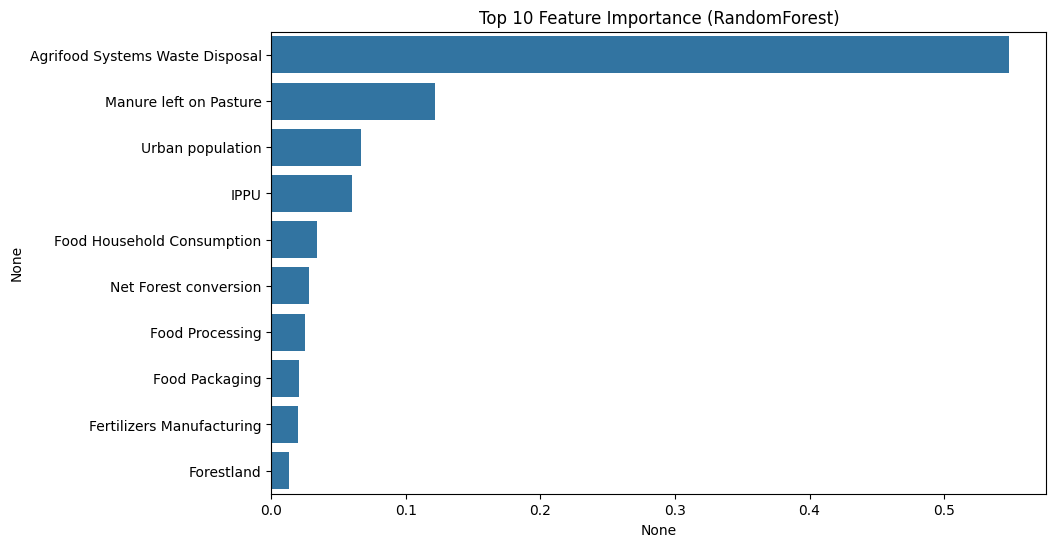

In [14]:
#Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top 10 Features for Emissions:\n")
print(importances.head(10))


plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importance (RandomForest)")
plt.show()

In [16]:
import joblib

joblib.dump(model, "co2_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']